# Homework 8: scikit-image

## Counting objects

In class, we saw how to count the number of objects in a microscopy image.  Here, we will repeat that exercise, but make use of some of the algorithms in `scikit-image` to segment the image, and then to determine properties of the resulting objects.

As input, use the image `skimage.data.coins`.  Segment the image, and then calculate the area and eccentricity of each coin.

There are various ways to do this.  One would be:

1. Equalize the input image (see `skimage.exposure`)
2. Threshold the image (`skimage.filters.otsu`)
3. Remove objects touching the boundary (`skimage.segmentation.clear_border`)
4. Apply morphological closing (`skimage.morphology.closing`)
5. Remove small objects (`skimage.measure.regionprops`).
   Visualize the results if you want with `skimage.color.label2rgb`.
7. Calculate the area and eccentricity of each coin, and display the
   original image with this information on it (`matplotlib.pyplot.text` or `matplotlib.pyplot.annotate`)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


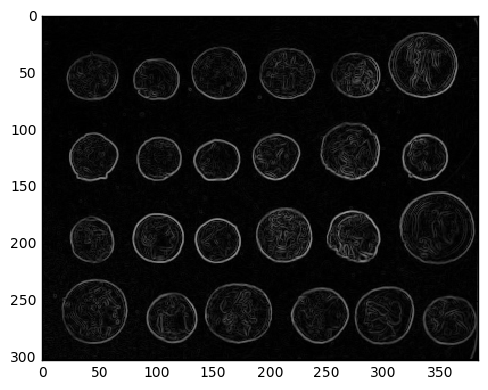

In [3]:
from skimage import data, filters, io

image = data.coins()
edges = filters.sobel(image)
io.imshow(edges)

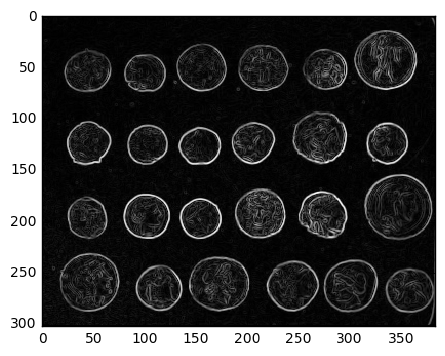

In [5]:
import matplotlib.pyplot as plt
plt.imshow(edges, cmap=plt.cm.gray, interpolation='nearest');

In [6]:
image = data.coins()[0:95, 70:370]

In [33]:
from skimage.filter import threshold_adaptive
from skimage.feature import peak_local_max
from skimage import filter
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label

#### Segmented Coin

/Users/kevinli/anaconda/lib/python3.5/site-packages/skimage/filter/__init__.py:42: skimage_deprecation: Call to deprecated function ``canny``. Use ``skimage.feature.canny`` instead.
  def canny(*args, **kwargs):


area is:  198
eccentricity is:  0.26921331026528283
area is:  162
eccentricity is:  0.34839966265764033
area is:  163
eccentricity is:  0.4099548151687769
area is:  139
eccentricity is:  0.3732585569224867
area is:  132
eccentricity is:  0.38727377456307754


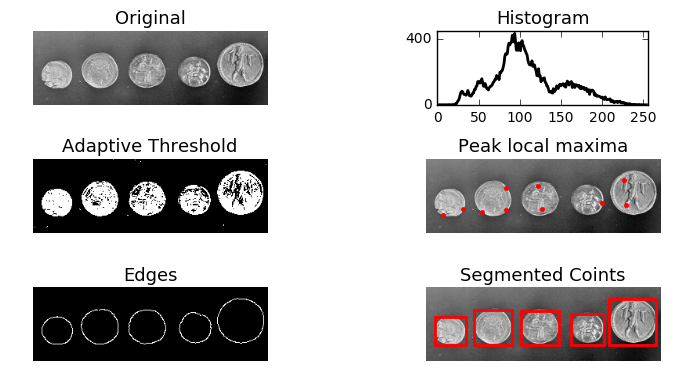

In [51]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8,4))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flat
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Original', fontsize = 13)
ax0.axis('off')

values, bins = np.histogram(image, bins=np.arange(256))
ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0,400])
ax1.set_aspect(.2)
ax1.set_title('Histogram', fontsize=13)

# Divide the foreground and background, we threshold the image to produce
# a binary image
# Applying the Threshold
bw = threshold_adaptive(image, 95, offset=-15)

ax2.imshow(bw, cmap=plt.cm.gray)
ax2.set_title('Adaptive Threshold', fontsize=13)
ax2.axis('off')

# Find Maxima
coordinates = peak_local_max(image, min_distance=20)

ax3.imshow(image, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:, 1],
         coordinates[:, 0], 'r.')
ax3.set_title('Peak local maxima', fontsize=13)
ax3.axis('off')

# Canny Edge Detector
edges = filter.canny(image, sigma=3,
                     low_threshold=10,
                     high_threshold=80)

ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=13)
ax4.axis('off')

# Label image regions.


label_image = label(edges)

ax5.imshow(image, cmap=plt.cm.gray)
ax5.set_title('Segmented Coints', fontsize=13)
ax5.axis('off')

for region in regionprops(label_image):
    print(region)
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    area = region.area # Calculating the area
    eccentricity = region.eccentricity
    print('area is: ', area)
    print('eccentricity is: ', eccentricity)
    #print('Position is:', region.location)
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=2)
    ax5.add_patch(rect)

plt.tight_layout()
plt.show()

#### Summary
We have demonstrated how we can calculate the area and eccentricity of the images as well as how to segment the coins from the images

In [38]:
label_image = label(edges)

In [52]:
region = regionprops(image)

162

## Panorama stitching

One of the scikit-image tutorials shows [how to do panorama stitching](https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/solutions/adv3_panorama-stitching-solution.ipynb).

Take 3 or 4 overlapping photos of your own, and use the procedure described to stitch your own panorama.

## Extra: Image Stacking

Reprocess one of the datasets from http://www.rawastrodata.com/.  See http://www.rawastrodata.com/pages/typesofimages.html for a description of the different kind of images.